In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print("Libraries imported.")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [15]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi").text

In [111]:
import re

In [ ]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'lxml')

In [17]:
# create a list to store neighborhood data
neighborhoodList = []

In [41]:
div = soup.find('div', class_="mw-parser-output" )
print("web Page Imported")
#Code to extract the relevent data from the request object using beautiful soup
data = pd.DataFrame(columns=['Borough','Neighborhood'])
i=-1
flag = False
no=0
prev_borough = None
for child in div.children:
    if child.name:
        span = child.find('span')
        if span!=-1 and span is not None:
            try:
                if span['class'][0] == 'mw-headline' and child.a.text!='edit':
                    prev_borough = child.a.text
                    i+=1
                    flag = True
                    continue
            except KeyError:
                continue
        if child.name=='ul' and flag==True:
            neighborhood = []
            for ch in child.children:
                
                try:
                    data.loc[no]=[prev_borough,ch.text]
                    no+=1
                except AttributeError:
                    pass
        flag = False
data[50:60]

web Page Imported


,Borough,Neighborhood
50,South Delhi,Defence Colony
51,South Delhi,East of Kailash
52,South Delhi,Govindpuri
53,South Delhi,Greater Kailash
54,South Delhi,Green Park
55,South Delhi,Gulmohar Park
56,South Delhi,Hauz Khas
57,South Delhi,Hauz Khas Village
58,South Delhi,Jangpura
59,South Delhi,Jor Bagh


In [96]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f1b6e1a80ca44a20a3408fbc3f613c46 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5ZMDasQw8i_WK3HC2kZWylhBtsCtRUttwqycJJpQKWXH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f1b6e1a80ca44a20a3408fbc3f613c46.get_object(Bucket='ibmprofessionalcerificate-donotdelete-pr-sw4sutmxwyueqn',Key='datasets_512081_944688_delhi_dataSet.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Unnamed: 0,Borough,Neighborhood,latitude,longitude
0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,North West Delhi,Begum Pur,NaN,NaN


In [134]:
df_data_3.dropna(inplace=True)
df_data_3.head()

,level_0,index,Borough,Neighborhood,latitude,longitude
0,0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,4,North West Delhi,Dhaka,39.031714,-90.261223


In [136]:
locations = df_data_3[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[28.688926399999996, 77.16168329999999]

In [137]:
map = folium.Map(location=[28.73, 77.03], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_data_3['Borough'][point]).add_to(map)
map

In [150]:
CLIENT_ID = 'HRMBKZUASN1NWO005IQK4TGG15UVEY5GCLJCYXHXW0VDP00K' # your Foursquare ID
CLIENT_SECRET = 'JSXFO23NR2OMICQSZRFQYDAZG1GMNRALXXACAFVNF5CGAM4C' # your Foursquare Secret
VERSION = '20180604'
limit = 20
print('Your credentails:')
print('CLIENT_ID:'+ CLIENT_ID)
print('CLIENT_SECRET:'+ CLIENT_SECRET)

Your credentails:
CLIENT_ID:HRMBKZUASN1NWO005IQK4TGG15UVEY5GCLJCYXHXW0VDP00K
CLIENT_SECRET:JSXFO23NR2OMICQSZRFQYDAZG1GMNRALXXACAFVNF5CGAM4C


In [151]:
# Let's create a function to repeat the process to all the neighborhoods in Toronto
def getNearbyVenues(names, latitudes,longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names,latitudes,longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
delhi_venues = getNearbyVenues(names=delhiData['Neighborhood'],
                                    latitudes=delhiData['latitude'],
                                    longitudes=delhiData['longitude']
                                   )

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Shastri Nagar
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Nand Nagri
Naveen Shahdara
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Patparganj
Preet Vihar
Anand Vihar
Shakarpur
Shastri Nagar
Vasundhara Enclave
Vishwas Nagar
Vivek Vihar
Shahd

In [153]:

body = client_f1b6e1a80ca44a20a3408fbc3f613c46.get_object(Bucket='ibmprofessionalcerificate-donotdelete-pr-sw4sutmxwyueqn',Key='datasets_512081_944688_restaurant_dataSet.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Adarsh Nagar,28.614193,77.071541,Eagle Boys Pizza,28.615595,77.070784,Pizza Place
1,1,Adarsh Nagar,28.614193,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,2,Adarsh Nagar,28.614193,77.071541,Bikano East Patel Nagar,28.616190,77.066978,Fast Food Restaurant
3,3,Adarsh Nagar,28.614193,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
4,4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant


In [156]:
map_res = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_data_4['Venue Latitude'], df_data_4['Venue Longitude'], df_data_4['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res)  
    
map_res

In [157]:
# one hot encoding
delhi_onehot = pd.get_dummies(df_data_4[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = df_data_4['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Cafeteria,Café,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hot Dog Joint,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Irani Cafe,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Northeast Indian Restaurant,Parsi Restaurant,Pizza Place,Portuguese Restaurant,Punjabi Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,Soup Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
delhi_onehot.shape

(849, 75)

In [159]:
#To be used while Generating Graphs
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Cafeteria,Café,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hot Dog Joint,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Irani Cafe,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Northeast Indian Restaurant,Parsi Restaurant,Pizza Place,Portuguese Restaurant,Punjabi Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,Soup Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.00,0.0,0.0,0.0,0.222222,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.111111,0.0,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anand Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.166667,0.000000,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashok Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Azadpur,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
for i in delhi_grouped.columns:
    print(i,end=", ")

Neighborhood, Afghan Restaurant, American Restaurant, Argentinian Restaurant, Asian Restaurant, Australian Restaurant, Awadhi Restaurant, BBQ Joint, Bagel Shop, Bakery, Bengali Restaurant, Bistro, Breakfast Spot, Buffet, Burger Joint, Burmese Restaurant, Cafeteria, Café, Chinese Restaurant, Comfort Food Restaurant, Deli / Bodega, Dhaba, Dim Sum Restaurant, Diner, Doner Restaurant, Donut Shop, Dumpling Restaurant, Eastern European Restaurant, Falafel Restaurant, Fast Food Restaurant, Fish & Chips Shop, Food, Food Court, Food Stand, Food Truck, French Restaurant, Fried Chicken Joint, Gastropub, Hot Dog Joint, Hyderabadi Restaurant, Indian Chinese Restaurant, Indian Restaurant, Indian Sweet Shop, Irani Cafe, Italian Restaurant, Japanese Restaurant, Korean Restaurant, Mediterranean Restaurant, Mexican Restaurant, Middle Eastern Restaurant, Modern European Restaurant, Molecular Gastronomy Restaurant, Mughlai Restaurant, Multicuisine Indian Restaurant, New American Restaurant, North Indian R

In [161]:
delhi_grouped.shape

(116, 75)

In [162]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [163]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Fast Food Restaurant,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
1,Alaknanda,BBQ Joint,Indian Restaurant,New American Restaurant,Restaurant,Middle Eastern Restaurant,Pizza Place,Steakhouse,Deli / Bodega,Dhaba,Dim Sum Restaurant
2,Anand Vihar,Indian Restaurant,Pizza Place,Indian Sweet Shop,Soup Place,Punjabi Restaurant,Vegetarian / Vegan Restaurant,Donut Shop,Deli / Bodega,Dhaba,Dim Sum Restaurant
3,Ashok Vihar,Indian Restaurant,Bakery,Diner,Falafel Restaurant,Dhaba,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
4,Azadpur,Café,Argentinian Restaurant,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop


In [164]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 3, 2, 3, 1, 3, 3, 3, 0], dtype=int32)

In [165]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = delhiData

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

delhi_merged.dropna(inplace=True)
delhi_merged.head() # check the last columns!

,level_0,index,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541,0.0,Fast Food Restaurant,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
1,1,1,North West Delhi,Ashok Vihar,28.699453,77.184826,2.0,Indian Restaurant,Bakery,Diner,Falafel Restaurant,Dhaba,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
2,2,2,North West Delhi,Azadpur,28.707657,77.175547,3.0,Café,Argentinian Restaurant,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
7,7,7,North West Delhi,Keshav Puram,28.688926,77.161683,3.0,Gastropub,Indian Restaurant,Café,Bakery,Food Truck,Food Stand,Food Court,Food,Fish & Chips Shop,Fast Food Restaurant
9,9,9,North West Delhi,Kohat Enclave,28.698041,77.140539,2.0,Indian Restaurant,Bakery,Food Court,Food,Eastern European Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop


In [166]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['latitude'], delhi_merged['longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [167]:
clusterdata = pd.merge(delhi_onehot.groupby('Neighborhood').sum(),delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
clusterdata = clusterdata.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
clusterdata.head()

Cluster Labels,0.0,1.0,2.0,3.0,4.0
Afghan Restaurant,0,0,0,10,0
American Restaurant,1,0,1,11,0
Argentinian Restaurant,0,0,0,1,0
Asian Restaurant,1,0,2,18,0
Australian Restaurant,0,0,0,1,0


In [168]:
import seaborn as sns

In [169]:
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

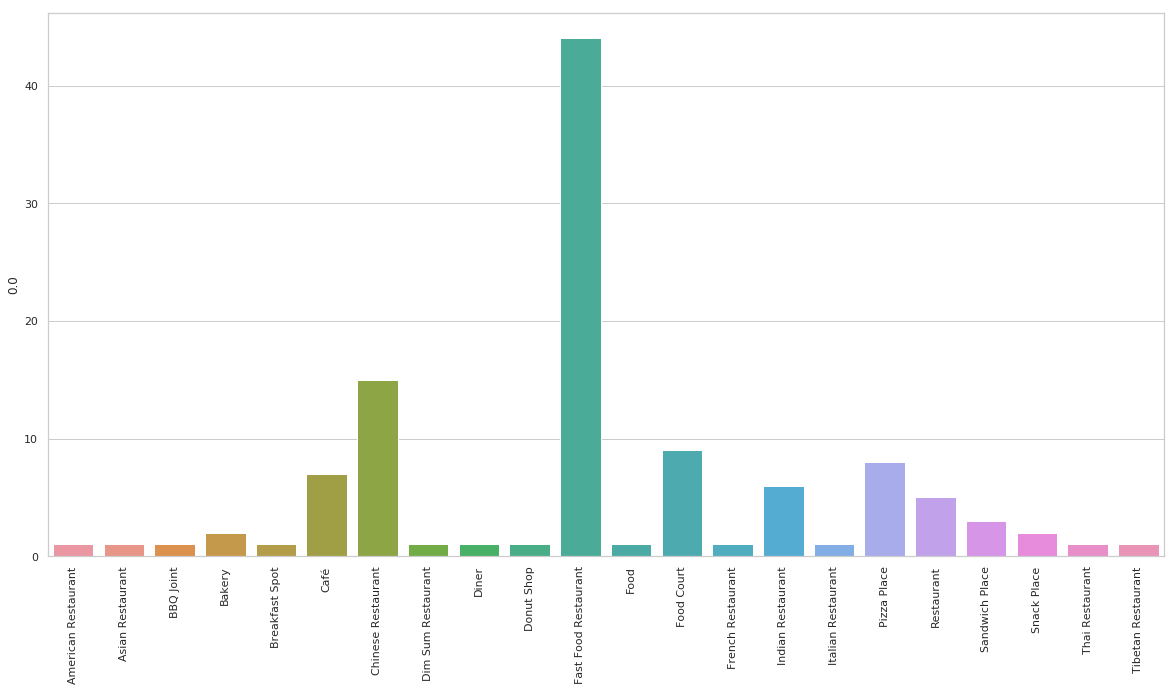

In [170]:
plot_bar(0)

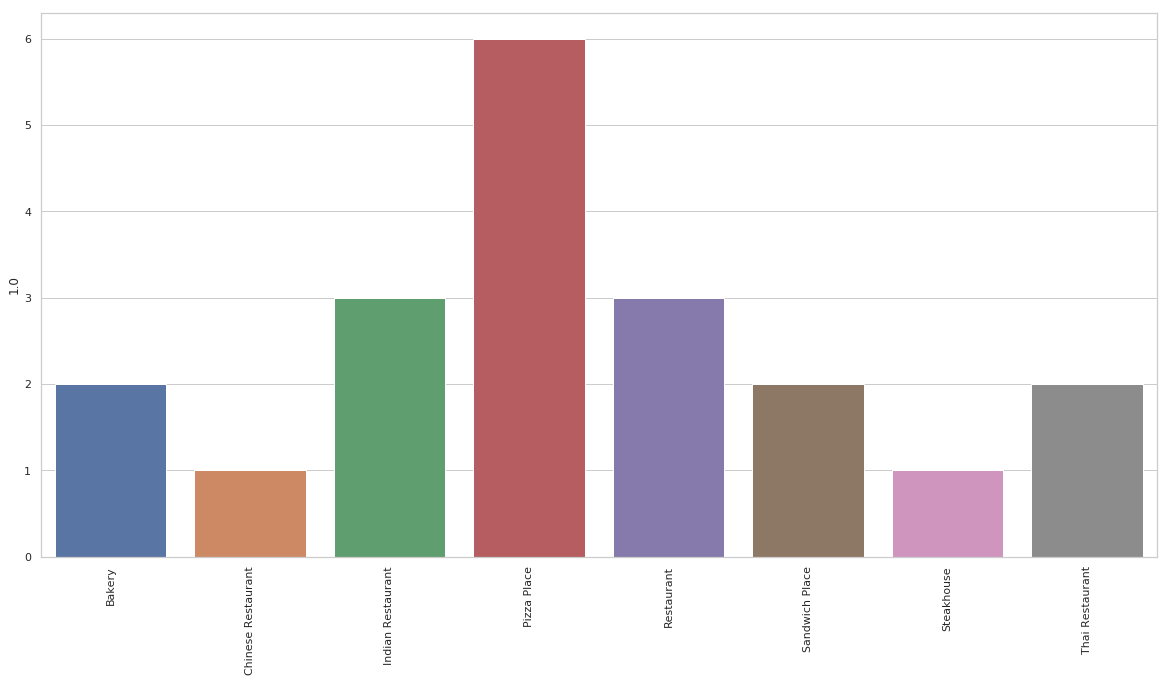

In [171]:
plot_bar(1)

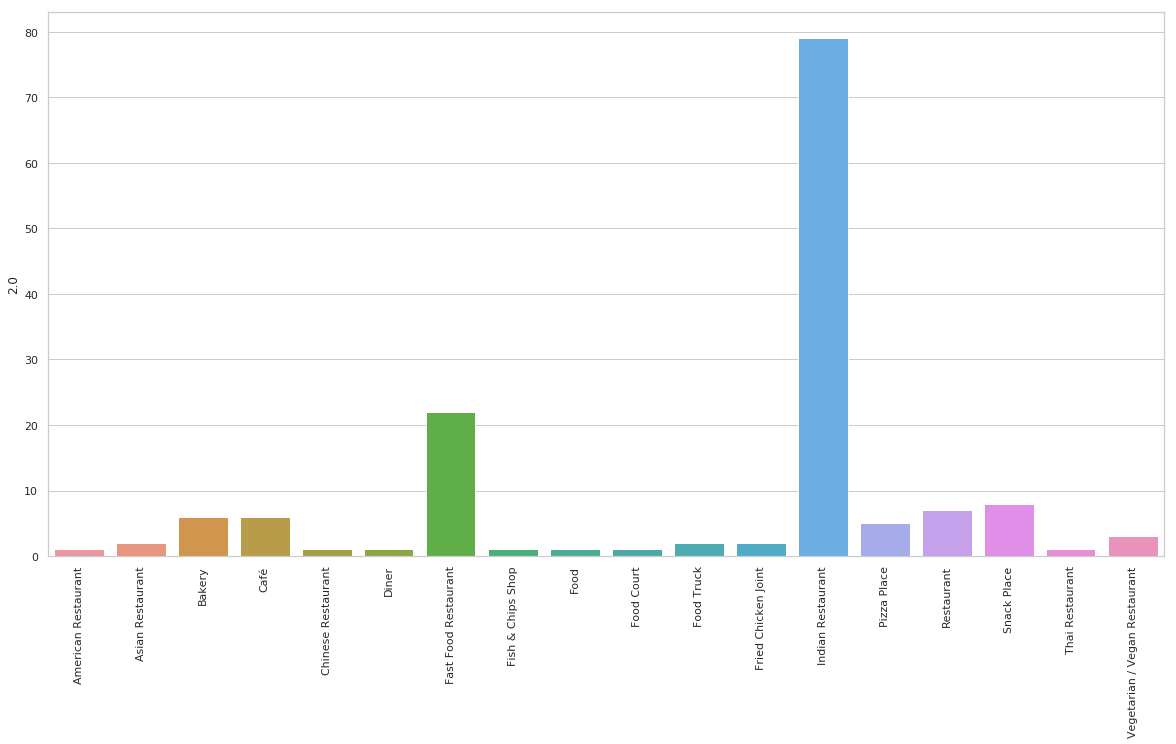

In [172]:
plot_bar(2)

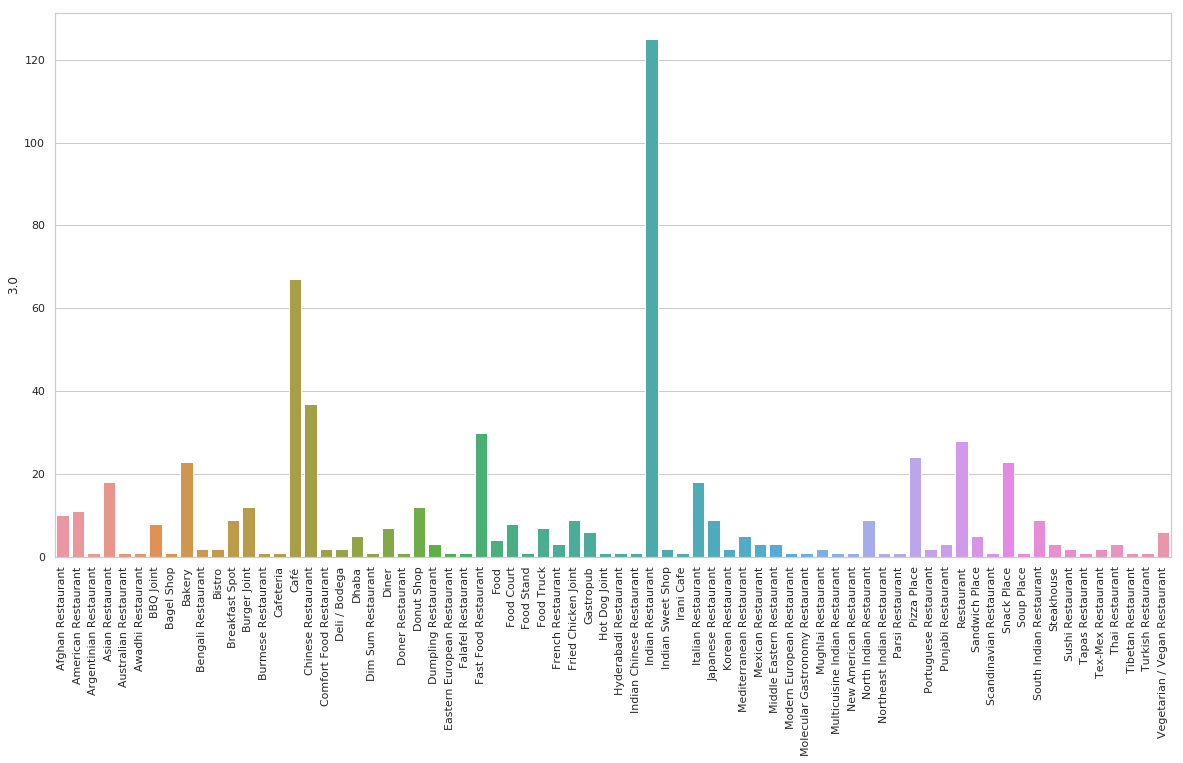

In [173]:
plot_bar(3)

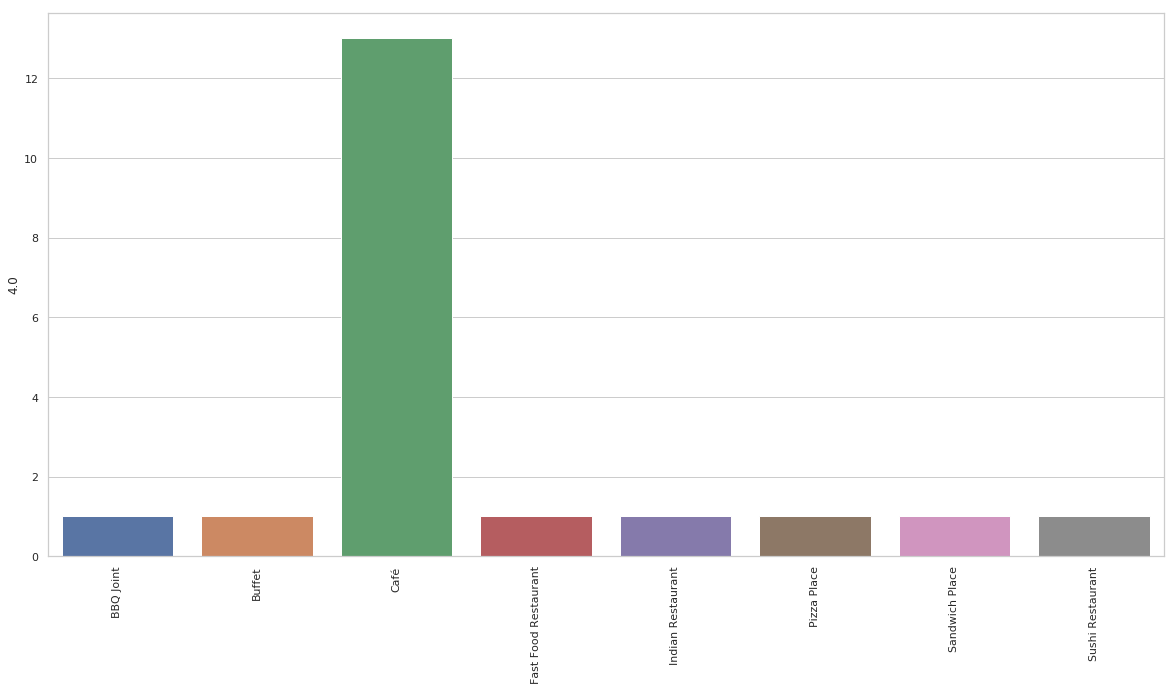

In [174]:
plot_bar(4)

In [176]:
df_data_4.drop('Unnamed: 0',axis=1,inplace=True)

In [177]:
forheatmap=df_data_4.copy()
forheatmap=pd.merge(forheatmap,delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
forheatmap.drop(forheatmap[~forheatmap['Cluster Labels'].isin([1,2])].index, inplace=True)

In [178]:
forheatmap.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,2.0
5,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery,2.0
6,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,2.0
7,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,2.0
17,Kohat Enclave,28.698041,77.140539,Peshawari,28.699012,77.139020,Indian Restaurant,2.0


In [179]:
from folium.plugins import HeatMap

In [180]:
#heat map of all restaurants in selected Neighborhoods
res_heat = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(forheatmap['Venue Latitude'],forheatmap['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat)
for lat, lng, label in zip(forheatmap['Neighborhood Latitude'], forheatmap['Neighborhood Longitude'], forheatmap['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat)
res_heat

In [181]:
forindres = forheatmap[forheatmap['Venue Category']=='Indian Restaurant']

# heat map for Indian Restaurants in the selected Neighborhoods
res_heat_ind = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(forindres['Venue Latitude'],forindres['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat_ind)
for lat, lng, label in zip(forindres['Neighborhood Latitude'], forindres['Neighborhood Longitude'], forindres['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat_ind)
res_heat_ind


In [182]:
count_all = forheatmap[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count = int(0.6*len(count_all))
print(count_all.iloc[target_count])
count_all.drop(count_all[count_all.Venue.values>7].index,inplace=True)
count_all.columns=['all count']
count_all.head()

Venue    4
Name: Jasola, dtype: int64


,all count
Neighborhood,
Vivek Vihar,1
Roshanara Bagh,1
Rithala,1
Pratap Nagar,1
Pragati Maidan,1


In [183]:
count_ind = forheatmap[forheatmap['Venue Category']=="Indian Restaurant"][['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count = int(0.3*len(count_ind))
print(count_ind.iloc[target_count])
count_ind.drop(count_ind[count_ind.Venue.values>1].index,inplace=True)
count_ind.columns = ['ind count']
count_ind.head()

Venue    2
Name: Pandav Nagar, dtype: int64


,ind count
Neighborhood,
Vivek Vihar,1
Bali Nagar,1
Roshanara Bagh,1
Pragati Maidan,1
Ghitorni,1


In [184]:
lowdensity = count_all.join(count_ind)
lowdensity.index.values


array(['Vivek Vihar', 'Roshanara Bagh', 'Rithala', 'Pratap Nagar',
       'Pragati Maidan', 'Geeta Colony', 'Inderpuri',
       'New Friends Colony', 'Ghitorni', 'Khanpur', 'Pandav Nagar',
       'Jhilmil Colony', 'Naraina', 'Pitam Pura', 'Rangpuri', 'Mehrauli',
       'Meera Bagh', 'Ashok Vihar', 'Vikaspuri', 'Jhandewalan', 'Jasola',
       'Gulmohar Park', 'Daryaganj', 'Bali Nagar', 'Lahori Gate',
       'Munirka', 'Patparganj', 'Dilshad Garden', 'Chawri Bazaar',
       'Mahipalpur'], dtype=object)

In [185]:
temp_recommend = delhiData.copy()
temp_recommend.drop(temp_recommend[~temp_recommend['Neighborhood'].isin(lowdensity.index.values)].index, inplace=True)
temp_recommend.head()


,level_0,index,Borough,Neighborhood,latitude,longitude
1,1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
12,12,12,North West Delhi,Pitam Pura,28.703268,77.132250
14,14,14,North West Delhi,Rithala,28.720806,77.107181
19,19,19,North Delhi,Chawri Bazaar,28.649927,77.229788
25,25,25,North Delhi,Lahori Gate,28.656841,77.218534


In [186]:
#most popular neighborhoods
top_nei = delhi_venues[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue', ascending=False).head(3).index.values
top_nei

array(['Sarojini Nagar', 'Hauz Khas Village', 'Khirki Village'],
      dtype=object)

In [188]:
toplatlng = delhiData[['Neighborhood','latitude','longitude']][delhiData['Neighborhood'].isin(top_nei)].reset_index()
toplatlng

,index,Neighborhood,latitude,longitude
0,95,Hauz Khas Village,28.553855,77.194713
1,103,Khirki Village,28.529885,77.218077
2,120,Sarojini Nagar,28.574158,77.195370
3,143,Sarojini Nagar,28.574158,77.195370


In [191]:
from math import sin, cos, sqrt, atan2, radians

def distanceInKM(la1,lo1,la2,lo2):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(la1)
    lon1 = radians(lo1)
    lat2 = radians(la2)
    lon2 = radians(lo2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dis = R * c
    return round(dis,4)

print("Result:", distanceInKM(toplatlng.iloc[2]['latitude'],toplatlng.iloc[2]['longitude'],toplatlng.iloc[0]['latitude'],toplatlng.iloc[0]['longitude']))


Result: 2.2592


In [194]:

temp_recommend.drop(columns=['index','Borough'], inplace=True)

In [195]:
temp_recommend.head()

,level_0,Neighborhood,latitude,longitude
1,1,Ashok Vihar,28.699453,77.184826
12,12,Pitam Pura,28.703268,77.132250
14,14,Rithala,28.720806,77.107181
19,19,Chawri Bazaar,28.649927,77.229788
25,25,Lahori Gate,28.656841,77.218534


In [196]:
for i in toplatlng.index:
    temp_recommend[toplatlng.iloc[i]['Neighborhood']] = temp_recommend.apply(lambda x : distanceInKM(toplatlng.iloc[i]['latitude'],toplatlng.iloc[i]['longitude'],x['latitude'],x['longitude']),axis=1)

In [197]:
temp_recommend.head()

,level_0,Neighborhood,latitude,longitude,Hauz Khas Village,Khirki Village,Sarojini Nagar
1,1,Ashok Vihar,28.699453,77.184826,16.2236,19.1385,13.9746
12,12,Pitam Pura,28.703268,77.132250,17.7027,21.0274,15.6271
14,14,Rithala,28.720806,77.107181,20.4417,23.8370,18.4439
19,19,Chawri Bazaar,28.649927,77.229788,11.2216,13.4011,9.0732
25,25,Lahori Gate,28.656841,77.218534,11.6889,14.1214,9.4709


In [206]:
# top 5 neighborhoods near Connaught Place
neiNearHK = temp_recommend.sort_values(by=['Hauz Khas Village']).iloc[:,:4].head().set_index('Neighborhood')
neiNearHK

,level_0,latitude,longitude
Neighborhood,,,
Gulmohar Park,93,28.557101,77.213006
Munirka,136,28.554886,77.171084
Mehrauli,108,28.521826,77.178323
Khanpur,102,28.512798,77.232395
Mahipalpur,134,28.544485,77.125691


In [207]:
# top 5 neighborhoods near Khirki Village
neiNearKV = temp_recommend.sort_values(by=['Khirki Village']).iloc[:,:4].head().set_index('Neighborhood')
neiNearKV

,level_0,latitude,longitude
Neighborhood,,,
Khanpur,102,28.512798,77.232395
Gulmohar Park,93,28.557101,77.213006
Mehrauli,108,28.521826,77.178323
Munirka,136,28.554886,77.171084
New Friends Colony,112,28.567101,77.269764


In [208]:
# top 5 neighborhoods near Khirki Village
neiNearSN = temp_recommend.sort_values(by=['Sarojini Nagar']).iloc[:,:4].head().set_index('Neighborhood')
neiNearSN

,level_0,latitude,longitude
Neighborhood,,,
Gulmohar Park,93,28.557101,77.213006
Munirka,136,28.554886,77.171084
Mehrauli,108,28.521826,77.178323
Pragati Maidan,64,28.623459,77.242512
New Friends Colony,112,28.567101,77.269764


In [209]:
final_recommend=neiNearHK.append(neiNearKV).append(neiNearSN).reset_index()
final_recommend.drop_duplicates(inplace=True)
final_recommend.reset_index(inplace=True)
final_recommend.drop(columns=['index'],inplace=True)
final_recommend

final = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(final_recommend['latitude'], final_recommend['longitude'], final_recommend['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(final)  
    
final